In [1]:
### DATA PREPROCESSING ###

In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Handel Missing Values

# Replace '?' with NaN
df = df.replace('?', pd.NA)

# Check missing values
print(df.isna().sum())

# Drop rows with missing values
df = df.dropna()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [6]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [7]:
# Convert categorical columns into numerical format using Label Encoding or One-Hot Encoding

from sklearn.preprocessing import LabelEncoder

df.columns = df.columns.str.strip()  


categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                    'relationship', 'race', 'sex', 'native.country', 'income']

label_encoders = {}
for col in categorical_cols:
    if col in df.columns:  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")

In [8]:
# Standardize numerical features to improve model performance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'education', 'capital.gain', 'capital.loss', 'hours.per.week']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
# Split Dataset

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
### PREPROCESSING ENDED ### 

In [11]:
### APPLYING RANDOM FOREST MODEL ###

In [12]:
# Step 01 - Training the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8488
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.73      0.62      0.67      1500

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [14]:
best_rf_model = grid_search.best_estimator_

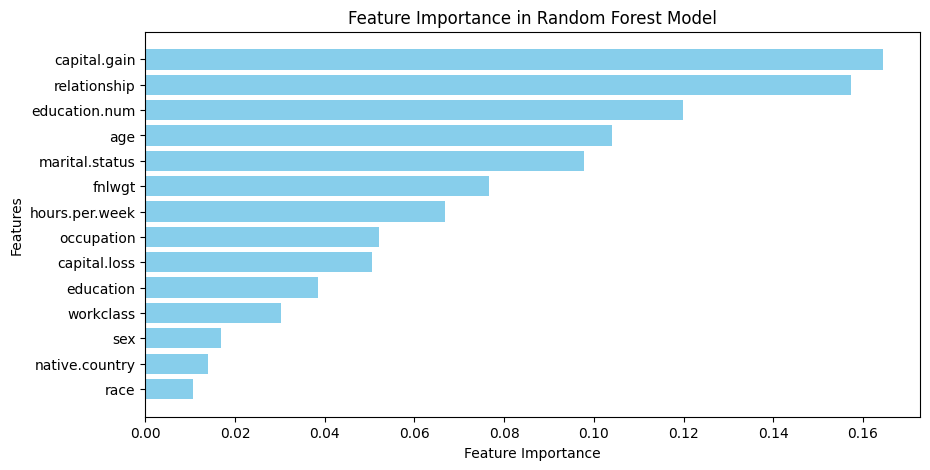

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure best_rf_model is assigned
if 'grid_search' in locals():
    best_rf_model = grid_search.best_estimator_
else:
    raise ValueError("Run GridSearchCV before accessing the best model!")

# Check feature importance attribute
if hasattr(best_rf_model, "feature_importances_"):
    feature_importance = best_rf_model.feature_importances_

    # Sort feature importance
    sorted_idx = np.argsort(feature_importance)[::-1]
    features = X_train.columns[sorted_idx]

    # Plot feature importance
    plt.figure(figsize=(10, 5))
    plt.barh(features, feature_importance[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance in Random Forest Model")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("The model does not support feature importance.")

In [16]:
# Create a copy of the processed DataFrame
df_vis = df.copy()

# Reverse Label Encoding for categorical columns
df_vis['income'] = label_encoders['income'].inverse_transform(df_vis['income'])
df_vis['relationship'] = label_encoders['relationship'].inverse_transform(df_vis['relationship'])

# Reverse StandardScaler for numerical features (to get original values)
numerical_cols = ['age', 'education', 'capital.gain', 'capital.loss', 'hours.per.week']
df_vis[numerical_cols] = scaler.inverse_transform(df_vis[numerical_cols])

/tmp/ipykernel_45847/1487493930.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


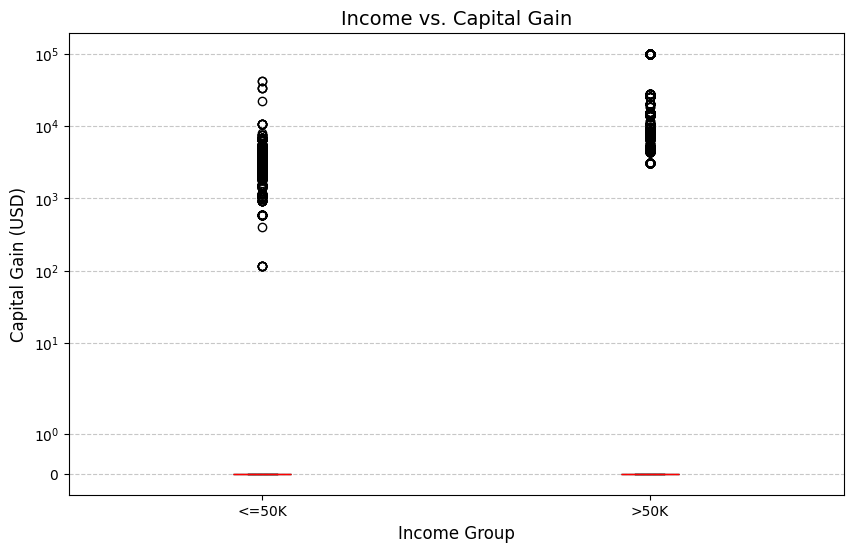

In [17]:
import matplotlib.pyplot as plt

# Split data by income groups
capital_gain_high = df_vis[df_vis['income'] == '>50K']['capital.gain']
capital_gain_low = df_vis[df_vis['income'] == '<=50K']['capital.gain']

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(
    [capital_gain_low, capital_gain_high],
    labels=['<=50K', '>50K'],
    patch_artist=True,  # Color the boxes
    boxprops=dict(facecolor='lightblue'),  # Box color
    medianprops=dict(color='red')  # Median line color
)

plt.title('Income vs. Capital Gain', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Capital Gain (USD)', fontsize=12)
plt.yscale('symlog')  # Handle outliers with logarithmic scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

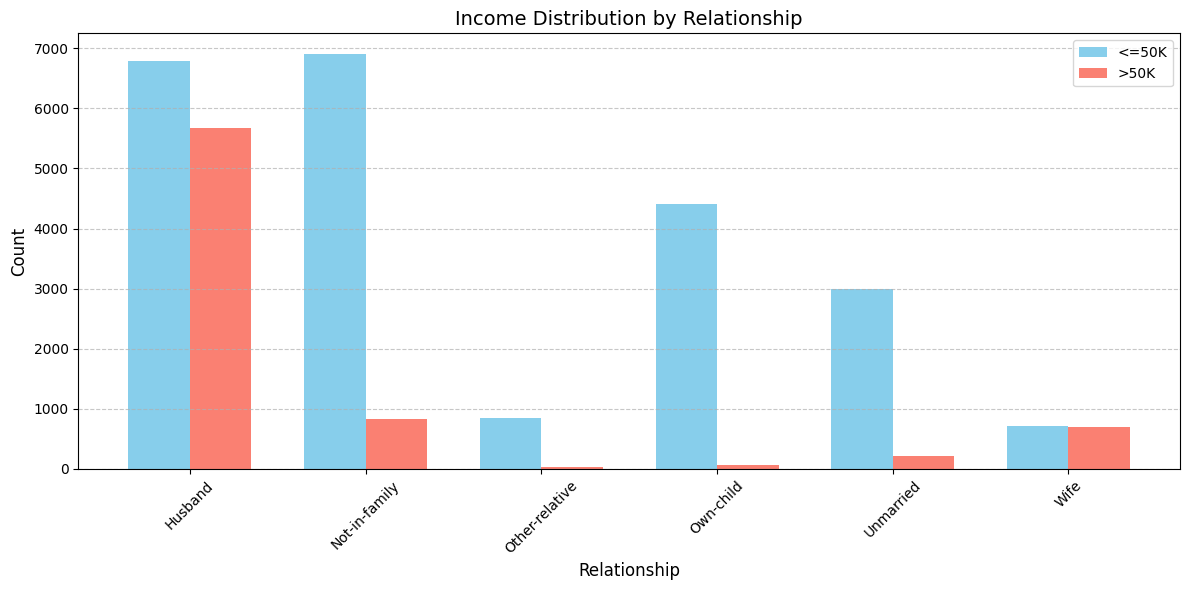

In [18]:
# Calculate counts of each income group per relationship
relationship_counts = df_vis.groupby(['relationship', 'income']).size().unstack()

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(relationship_counts))

# Plot bars for <=50K and >50K
bar1 = plt.bar(
    index, 
    relationship_counts['<=50K'], 
    width=bar_width, 
    label='<=50K', 
    color='skyblue'
)
bar2 = plt.bar(
    [i + bar_width for i in index], 
    relationship_counts['>50K'], 
    width=bar_width, 
    label='>50K', 
    color='salmon'
)

plt.title('Income Distribution by Relationship', fontsize=14)
plt.xlabel('Relationship', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([i + bar_width/2 for i in index], relationship_counts.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

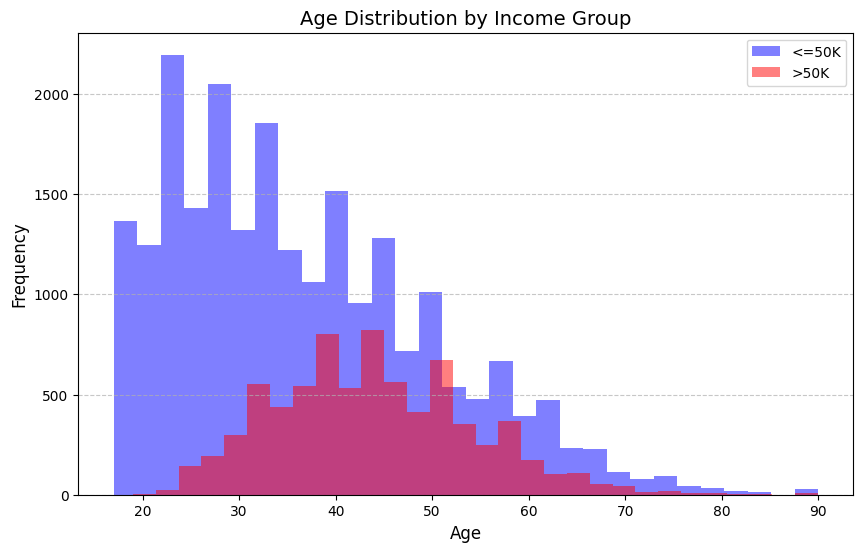

In [19]:
# Split age data by income groups
age_high = df_vis[df_vis['income'] == '>50K']['age']
age_low = df_vis[df_vis['income'] == '<=50K']['age']

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(
    age_low, 
    bins=30, 
    alpha=0.5, 
    label='<=50K', 
    color='blue'
)
plt.hist(
    age_high, 
    bins=30, 
    alpha=0.5, 
    label='>50K', 
    color='red'
)

plt.title('Age Distribution by Income Group', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()